<a href="https://colab.research.google.com/github/divyangnotfound/AICTE-OIB-SIP-AUGUST---P1-PROJECT/blob/main/OIBSIP_Data_Science_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Unemployment Analysis with Python**

Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19.

The story behind the dataset is how lock-down affected employment opportunities and how the unemployment rate increased during the Covid-19.

Content
* The dataset contains the unemployment rate of all the states in India :

* Region = states in India

* Date = date which the unemployment rate observed

* Frequency = measuring frequency (Monthly)

* Estimated Unemployment Rate (%) = percentage of people unemployed in each States of India

* Estimated Employed = percentage of people employed

* Estimated Labour Participation Rate (%) = labour force participation rate by dividing the number of people actively participating in the labour force by the total number of people eligible to participate in the labor force


In [6]:
#Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv('/content/drive/MyDrive/Input_Data/Unemployment_Rate_upto_11_2020.csv') #Read dataset
df.sample(5)  #fetch five sample of dataset

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
82,Himachal Pradesh,31-03-2020,M,18.76,2021858,41.04,North,31.1048,77.1734
199,Sikkim,31-03-2020,M,23.57,262895,60.59,Northeast,27.5330,88.5122
33,Chhattisgarh,30-04-2020,M,3.41,7600448,35.58,West,21.2787,81.8661
32,Chhattisgarh,31-03-2020,M,7.54,9302317,45.59,West,21.2787,81.8661
202,Sikkim,30-06-2020,M,4.46,221058,40.40,Northeast,27.5330,88.5122


In [10]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [11]:
df[' Frequency'].value_counts()

,count
Frequency,
M,267


In [12]:
print(df['Region.1'].value_counts())
print(df['Region'].value_counts())

Region.1
North        79
South        60
West         50
East         40
Northeast    38
Name: count, dtype: int64
Region
Andhra Pradesh      10
Assam               10
Bihar               10
Chhattisgarh        10
Delhi               10
Goa                 10
Gujarat             10
Haryana             10
Himachal Pradesh    10
Jharkhand           10
Karnataka           10
Rajasthan           10
Kerala              10
Madhya Pradesh      10
Maharashtra         10
Meghalaya           10
Odisha              10
Puducherry          10
Punjab              10
Uttarakhand         10
Tamil Nadu          10
Telangana           10
Tripura             10
West Bengal         10
Uttar Pradesh       10
Jammu & Kashmir      9
Sikkim               8
Name: count, dtype: int64


In [13]:
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
print('row count--->',df.shape[0])
print('column count--->',df.shape[1])

row count---> 267
column count---> 9


In [16]:
df.dtypes

,0
Region,object
Date,object
Frequency,object
Estimated Unemployment Rate (%),float64
Estimated Employed,int64
Estimated Labour Participation Rate (%),float64
Region.1,object
longitude,float64
latitude,float64


In [17]:
df[["day", "month", "year"]] = df[' Date'].str.split("-", expand = True)
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,day,month,year
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740,31,01,2020
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740,29,02,2020
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740,31,03,2020
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740,30,04,2020
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740,31,05,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855,30,06,2020
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855,31,07,2020
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855,31,08,2020
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855,30,09,2020


In [18]:
df.drop(columns=[' Frequency'],axis=1,inplace=True)

In [19]:
df[:5]

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,day,month,year
0,Andhra Pradesh,31-01-2020,5.48,16635535,41.02,South,15.9129,79.74,31,01,2020
1,Andhra Pradesh,29-02-2020,5.83,16545652,40.90,South,15.9129,79.74,29,02,2020
2,Andhra Pradesh,31-03-2020,5.79,15881197,39.18,South,15.9129,79.74,31,03,2020
3,Andhra Pradesh,30-04-2020,20.51,11336911,33.10,South,15.9129,79.74,30,04,2020
4,Andhra Pradesh,31-05-2020,17.43,12988845,36.46,South,15.9129,79.74,31,05,2020


In [20]:
import matplotlib.pyplot as plt

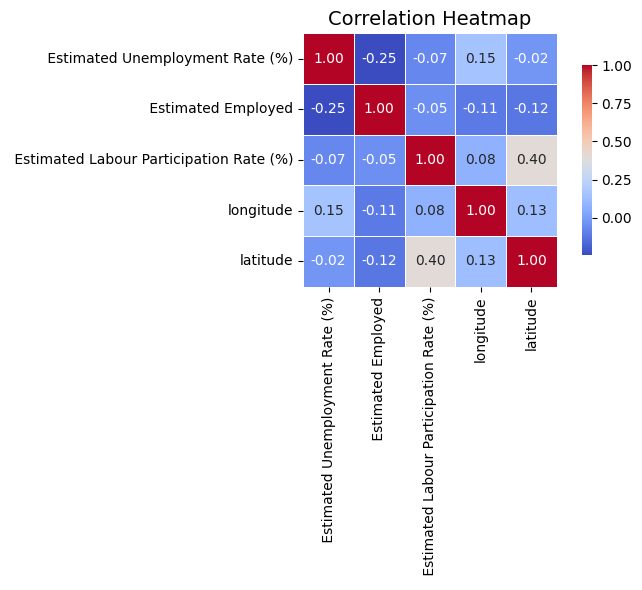

In [22]:
plt.figure(figsize=(8, 6))  # Wider size for better readability
sns.heatmap(
    df.corr(numeric_only=True),  # Ensures only numeric columns are included
    annot=True,
    fmt=".2f",                   # Limits float annotation to 2 decimal places
    cmap='coolwarm',            # Better color contrast
    linewidths=0.5,             # Adds spacing between cells
    square=True,                # Makes cells square-shaped
    cbar_kws={'shrink': 0.75}   # Shrinks colorbar to fit better
)

plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

The heatmap provides a graphical representation of the correlation matrix, allowing us to observe the relationships between features. From the above visualization, we can infer that Estimated Labour Participation Rate and Latitude exhibit a strong positive correlation (approximately 0.40). On the other hand, Estimated Employed and Estimated Unemployment Rate show a strong negative correlation, suggesting an inverse relationship. These features may play a significant role in further analysis and predictive modeling.

In the context of feature selection, when an independent (predictor) feature is strongly correlated with the dependent (target) variable, it is generally considered useful for model training. However, when multiple independent features are highly correlated with each other (multicollinearity), they may introduce redundancy into the model. This can lead to overfitting and reduce model interpretability. Therefore, it is advisable to identify and remove such duplicate or highly correlated features during the feature selection process to improve model performance and generalization.

In [23]:
df.columns

Index(['Region', ' Date', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude', 'day', 'month', 'year'],
      dtype='object')

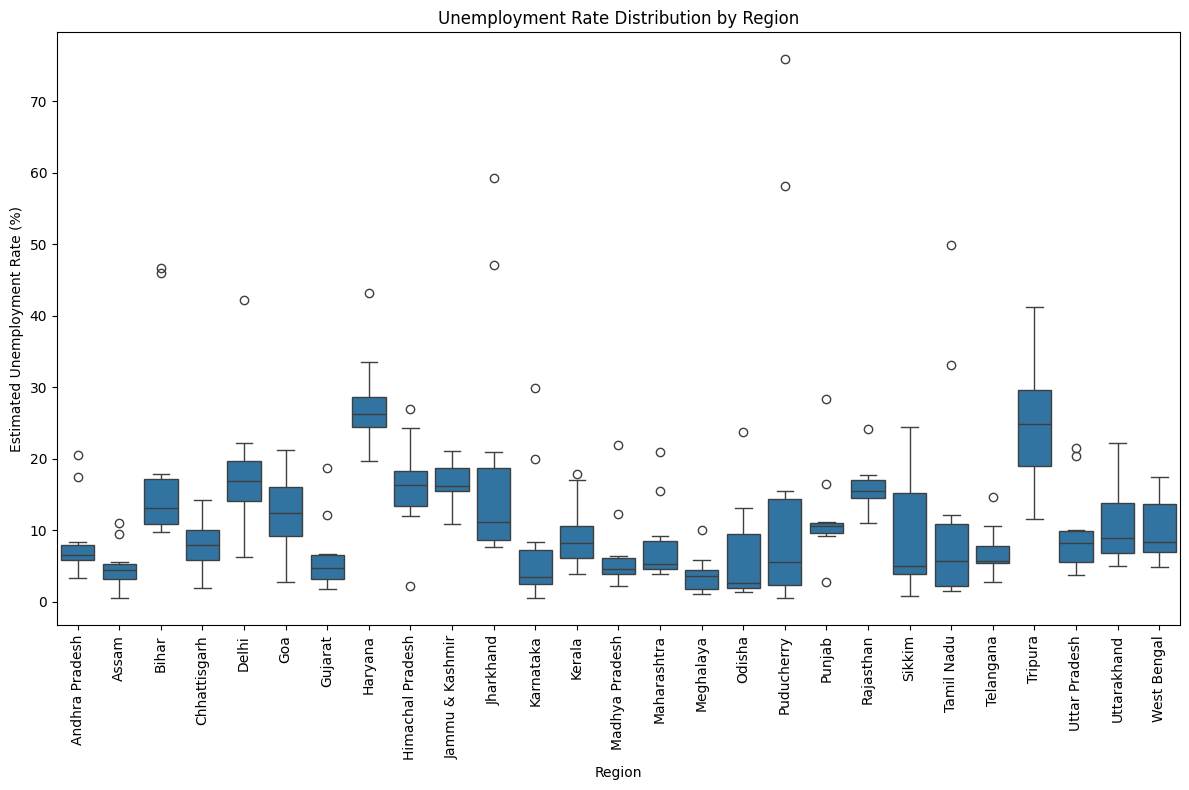

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Region', y=' Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.title('Unemployment Rate Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.tight_layout()
plt.show()

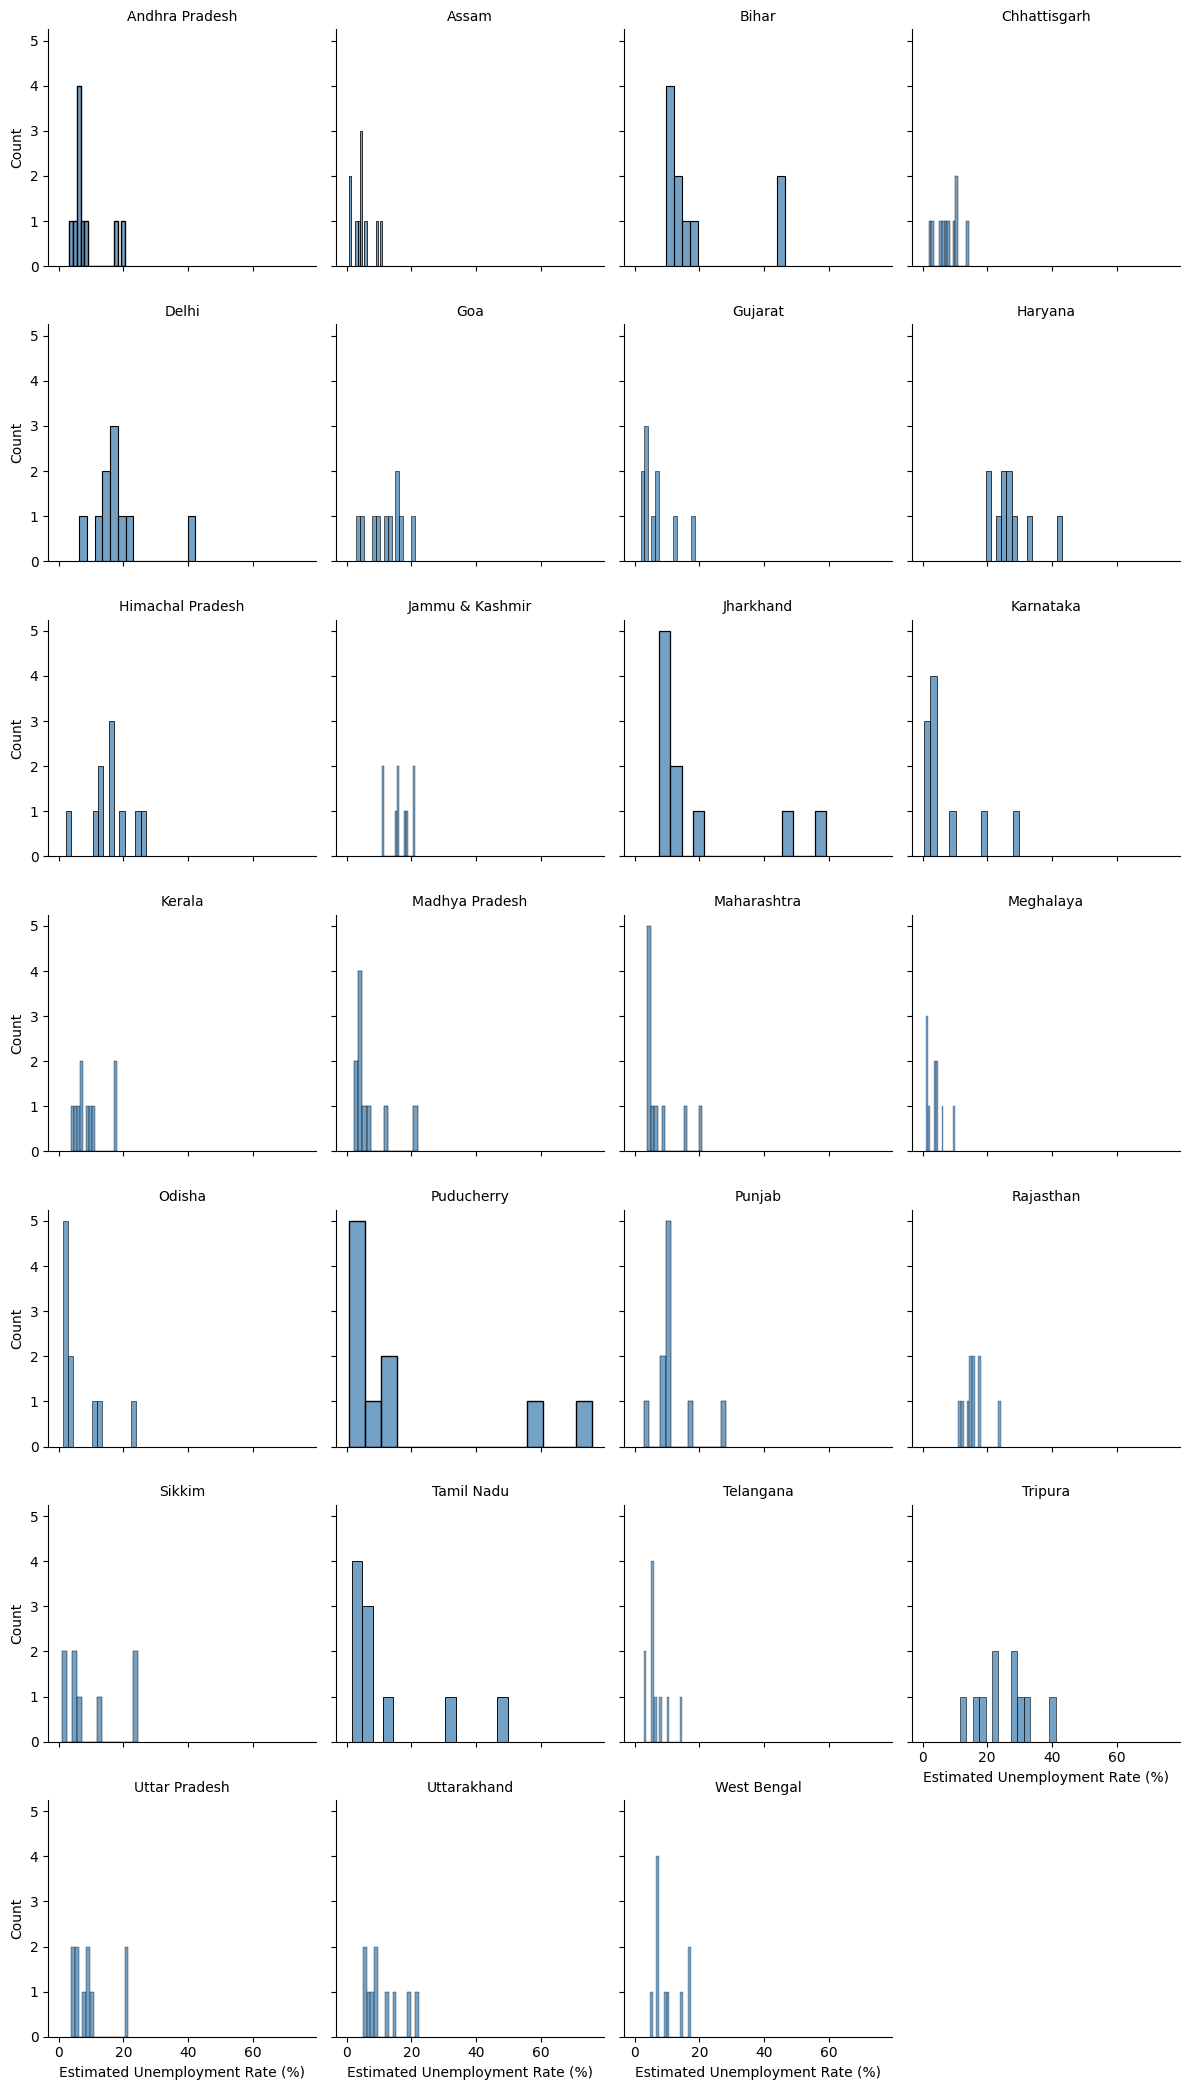

In [32]:
g = sns.FacetGrid(df, col='Region', col_wrap=4, height=3, sharex=True, sharey=True)
g.map(sns.histplot, ' Estimated Unemployment Rate (%)', bins=15, color='steelblue')
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Estimated Unemployment Rate (%)', 'Count')
plt.tight_layout()
plt.show()


The above histogram shows significant variation in unemployment rates across Indian regions. Some regions, like Tripura and Puducherry, show a wide range with higher unemployment values, indicating localized economic challenges.

In contrast, regions such as Delhi, Goa, and Maharashtra have unemployment rates concentrated at lower levels, suggesting more stable labor markets. Regions with narrow distributions, including Haryana and Punjab, likely experience consistent employment conditions.

These differences highlight the need for region-specific policies, targeting areas with high variability and elevated unemployment to promote balanced economic development.

In [34]:
df.columns

Index(['Region', ' Date', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude', 'day', 'month', 'year'],
      dtype='object')

In [35]:
df.month.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10'],
      dtype=object)

<Axes: xlabel='month', ylabel=' Estimated Unemployment Rate (%)'>

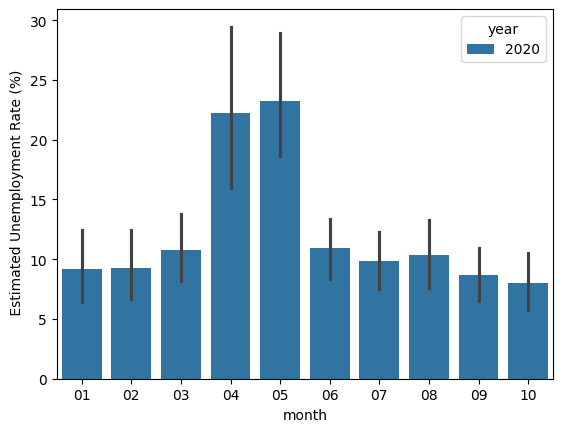

In [36]:
sns.barplot(x='month',y=' Estimated Unemployment Rate (%)',hue='year',data=df)

In the year 2020, during the COVID-19 pandemic, the highest unemployment rate was observed in the fifth month, reaching approximately 23–23.5%. Conversely, the lowest unemployment rate occurred in the tenth month, ranging between 8 and 8.5%.

In [37]:
df.day.unique()

array([' 31', ' 29', ' 30'], dtype=object)

<Axes: xlabel='day', ylabel=' Estimated Unemployment Rate (%)'>

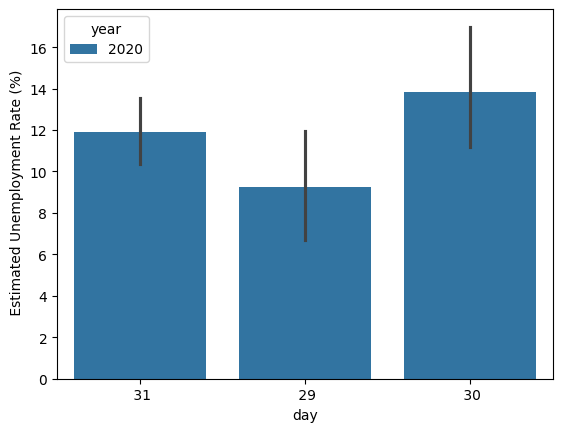

In [38]:
sns.barplot(x='day',y=' Estimated Unemployment Rate (%)',hue='year',data=df)

The plot shows unemployment rates for the 29th, 30th, and 31st days of 2020. The highest unemployment rate is on the 30th day, about 14%, meaning more people lost jobs near the end of the month. The 31st day also has a high rate, while the 29th day has the lowest. This suggests that job losses tend to increase around month-end.

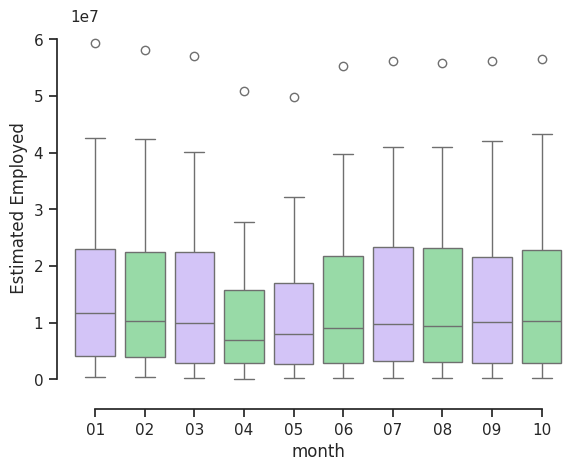

In [39]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="month", y=' Estimated Employed', palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

The boxplot illustrates the monthly distribution of the data using quantiles. It indicates that, except for the 4th and 5th months, the unemployment rate did not fluctuate significantly during the 2020 pandemic. This suggests that job loss was relatively stable throughout most of the year, with notable increases primarily in April and May.

In [40]:
df[:5]

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,day,month,year
0,Andhra Pradesh,31-01-2020,5.48,16635535,41.02,South,15.9129,79.74,31,01,2020
1,Andhra Pradesh,29-02-2020,5.83,16545652,40.90,South,15.9129,79.74,29,02,2020
2,Andhra Pradesh,31-03-2020,5.79,15881197,39.18,South,15.9129,79.74,31,03,2020
3,Andhra Pradesh,30-04-2020,20.51,11336911,33.10,South,15.9129,79.74,30,04,2020
4,Andhra Pradesh,31-05-2020,17.43,12988845,36.46,South,15.9129,79.74,31,05,2020


This year column can be dropped because it also contains constant values of year 2020 which are unnecessary for the current scenario.

In [41]:
df.drop('year',axis=1)

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,day,month
0,Andhra Pradesh,31-01-2020,5.48,16635535,41.02,South,15.9129,79.740,31,01
1,Andhra Pradesh,29-02-2020,5.83,16545652,40.90,South,15.9129,79.740,29,02
2,Andhra Pradesh,31-03-2020,5.79,15881197,39.18,South,15.9129,79.740,31,03
3,Andhra Pradesh,30-04-2020,20.51,11336911,33.10,South,15.9129,79.740,30,04
4,Andhra Pradesh,31-05-2020,17.43,12988845,36.46,South,15.9129,79.740,31,05
...,...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,7.29,30726310,40.39,East,22.9868,87.855,30,06
263,West Bengal,31-07-2020,6.83,35372506,46.17,East,22.9868,87.855,31,07
264,West Bengal,31-08-2020,14.87,33298644,47.48,East,22.9868,87.855,31,08
265,West Bengal,30-09-2020,9.35,35707239,47.73,East,22.9868,87.855,30,09


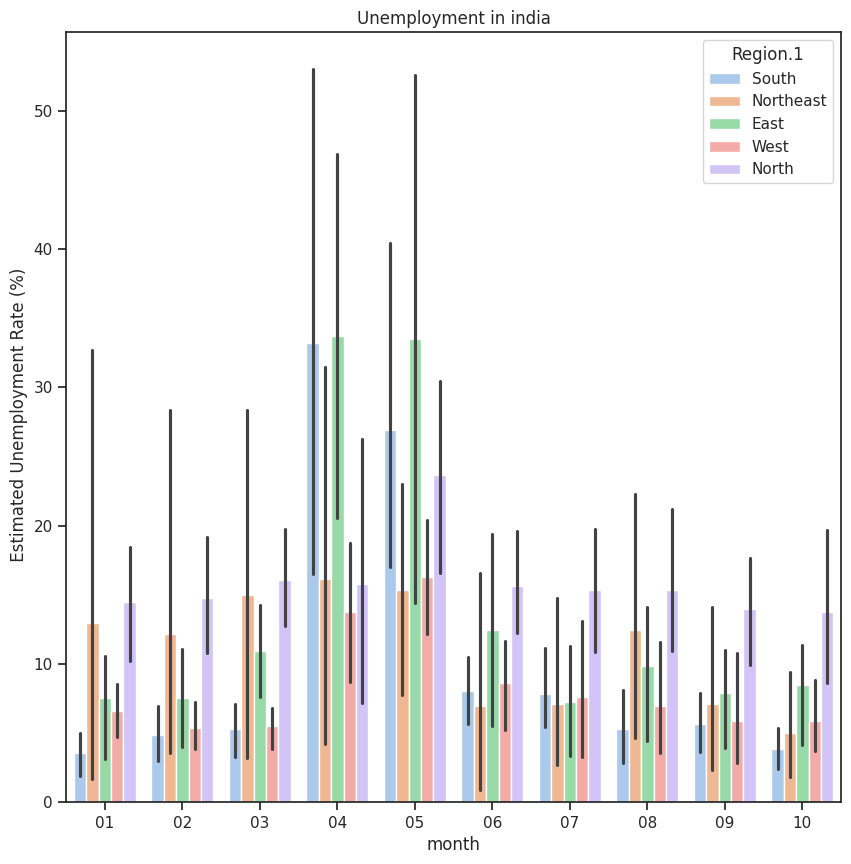

In [42]:
plt.figure(figsize=(10,10))
plt.title("Unemployment in india")
sns.barplot(x='month',y =' Estimated Unemployment Rate (%)',hue='Region.1', data=df)
plt.show()

The plot shows how unemployment changed across different regions of India from January to October. There's a clear spike in April and May, especially in the East and South, where unemployment crossed 30%. This aligns with the peak of the COVID-19 lockdowns, which heavily impacted jobs during that time. After May, the unemployment rate gradually dropped in all regions, although the North continued to have slightly higher rates than others. On the other hand, the West and Northeast were less affected overall. This suggests that while the pandemic hit the job market hard in the early months, especially in certain regions, things started to improve as restrictions eased.

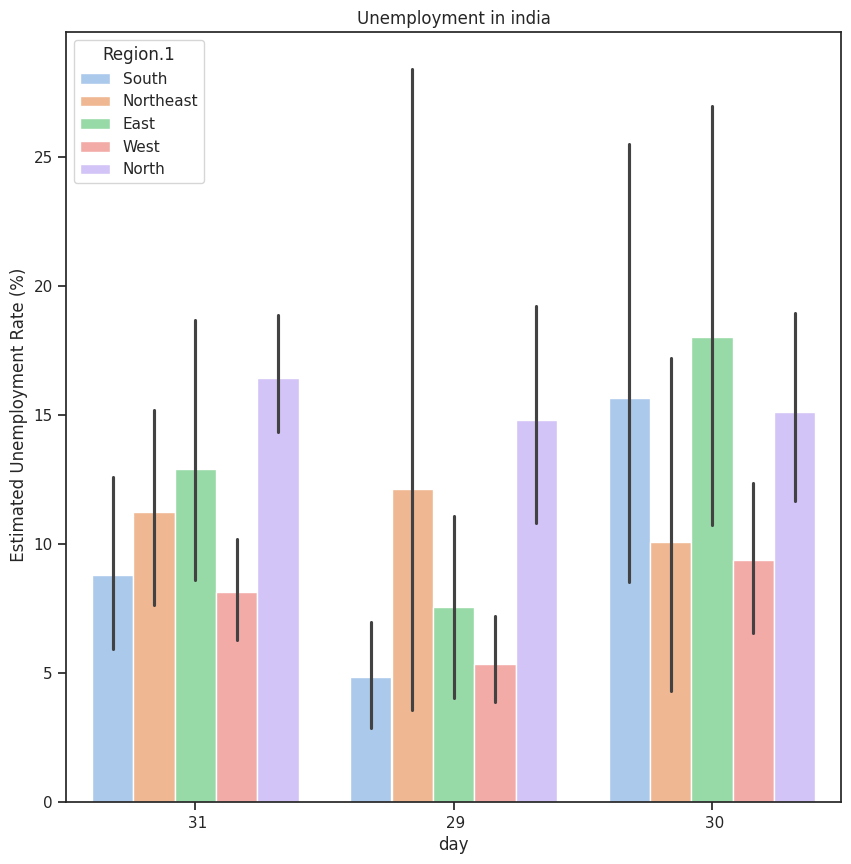

In [43]:
plt.figure(figsize=(10,10))
plt.title("Unemployment in india")
sns.barplot(x='day',y =' Estimated Unemployment Rate (%)',hue='Region.1', data=df)
plt.show()

This plot shows the estimated unemployment rate across different regions of India based on specific days—29th, 30th, and 31st. Among these, the 30th consistently shows higher unemployment rates in most regions, especially in the East and South, suggesting that job losses were more significant near the end of the month. The North region also maintains relatively high unemployment across all three days. In contrast, the 29th tends to show the lowest rates, particularly in the South and West. Overall, this suggests a possible pattern where unemployment spikes around the month-end, which could be linked to contract job terminations, project closures, or financial cycle cut-offs.